**CONSIGNA**
1. Dada la foto Will(Original).bmp que llevó Joyce a la estación de policía y la lista de fotos obtenidas por el sistema de búsqueda, implementar un algoritmo que permita ordenar la lista según su parecido con la foto de Will que entregó Joyce, utilizando el factor de correlación como medida de similitud. Analizar los resultados obtenidos.


En el siguiente fragmeto se cargan las imagenes de Will (original y a comparar)

In [5]:
import os
filenames = os.listdir("img")
filenames.sort()
print(filenames)

['Will(Original).bmp', 'Will_1.bmp', 'Will_2.bmp', 'Will_3.bmp', 'Will_4.bmp', 'Will_5.bmp', 'Will_Canal10.bmp', 'Will_Canal2.bmp', 'Will_Canal8.bmp', 'Will_ej2.bmp']


In [6]:
import math

def media(imagen, cuadrada=False):
    largo = len(imagen)
    ancho = len(imagen[0])
    suma = 0

    for x in range(largo):
        for y in range(ancho):
            if cuadrada:
                suma += int(imagen[x][y]) * int(imagen[x][y])
            else:
                suma += int(imagen[x][y])

    return float(suma)/(largo*ancho)

In [4]:
def desvio(imagen, media_imagen):
    """
    desvio = sqrt(<x2> - <x>2)
    """
    media_cuadrada_imagen = media(imagen,True)
    varianza = media_cuadrada_imagen - (media_imagen*media_imagen)
    desvio = math.sqrt(varianza)
    return desvio

In [5]:
def correlacion_cruzada(imagen_a,imagen_b):
    if(len(imagen_a)!= len(imagen_b) or len(imagen_a[0]) != len(imagen_b[0])):
        return

    suma_ambos = 0
    largo = len(imagen_a)
    ancho = len(imagen_a[0])
    for x in range(largo):
        for y in range(ancho):
            suma_ambos += int(imagen_a[x][y]) * int(imagen_b[x][y])

    return  float(suma_ambos)/(largo*ancho)

In [6]:
def factor_correlacion_cruzada(imagen_a,imagen_b):
    media_a = media(imagen_a)
    media_b = media(imagen_b)
    desvio_a = desvio(imagen_a, media_a)
    desvio_b = desvio(imagen_b, media_b)
    correlacion_cruzada_ambas = correlacion_cruzada(imagen_a,imagen_b)

    return round((float(correlacion_cruzada_ambas - (media_a*media_b))) / (desvio_a*desvio_b) , 5)

In [7]:
import os
import imageio

will_original = imageio.imread(os.path.join("img",filenames[0]))
will_fotos_busqueda = []
for i in range(1,6):
  #En la segunda posicion se guarda el factor de correlacion cruzada para posteriormente ordenarlo
  will_fotos_busqueda.append( imageio.imread(os.path.join("img",filenames[i])))  

will_policia = imageio.imread(os.path.join("img",filenames[-1]))

In [8]:
import numpy as np

resultados = []
i = 1
for imagen in will_fotos_busqueda:
    print("Procesado imagen " + str(i) + " ...")
    corr = factor_correlacion_cruzada(will_original,imagen)
    resultados.append(("Imagen " + str(i), corr,imagen))
    i += 1


Procesado imagen 1 ...


NameError: name 'factor_correlacion_cruzada' is not defined

In [10]:
# ordenar los resultados
resultados.sort(key=lambda x: x[1], reverse=True)
for r in resultados:
    print(r[0])

Populating the interactive namespace from numpy and matplotlib


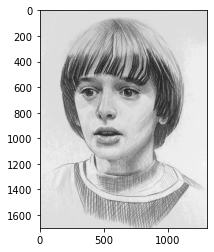

In [11]:
%pylab inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(will_original,cmap='gray',vmin=0,vmax=255)
plt.show()

2- Un policía amigo de Joyce llegó a la estación de policía un rato más tarde, trayendo consigo otra foto para analizarla. El policía de guardia, para ahorrarse la búsqueda en el SIDPE, propuso estudiar las similitudes respecto a la imagen que llevó Joyce mediante esta estrategia a implementar: Obtener la distribución de intensidades de la imagen de la foto que llevó Joyce, de la foto del niño más parecido (obtenida por el sistema de búsqueda) y de la foto que tenía el policía en su billetera. Generar el histograma de cada imagen y calcular la media y el desvío de cada distribución. Analizar las similitudes y diferencias entre uno y otro indicador.

In [12]:
def distribucion_intensidad(imagen):
    #posible mejora, en ves de usar un arreglo usar otra estructura
    #como un mapa o algo asi porque hay muchos valores de intesidad 
    #que no se usan
    dist = {} #esto nose si se hace asi -> joya
    largo = len(imagen)
    ancho = len(imagen[0])
    for x in range(largo):
        for y in range(ancho):
            valor = (int)(imagen[x][y])
            if valor in dist:
                dist[valor] += 1
            else:
                dist[valor] = 1
    for key in dist:
        dist[key]=(float)(dist[key]/(largo*ancho))
    return dist


distribucion_original = distribucion_intensidad(will_original)
distribucion_parecida = distribucion_intensidad(will_fotos_busqueda[0])
distribucion_policia = distribucion_intensidad(will_policia)

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13,6)

# funcion para generar histograma a partir de una distribucion
def generar_histograma(distribucion):
    valores = list(distribucion.values())
    intensidades = list(distribucion.keys())

    # configuracion del plotting
    figura = plt.figure()
    ejes = figura.add_axes([0,0,1,1])
    histograma = ejes.bar(intensidades,valores,width=14)
    plt.xticks(intensidades,intensidades)

    # titulos y labels
    ejes.set_title('Distribucion de intensidades')
    ejes.set_xlabel('Intesidad (0 a 255)')
    ejes.set_ylabel('Probabilidad')
    
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas
    plt.autoscale(False)

    # Funcion para poner el label arriba de cada barrita
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round((float)(rect.get_height()),4)
            ejes.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',fontsize=10)

    # generar autolabels
    autolabel(histograma)

    # Mostrar el grafico
    plt.show()

generar_histograma(distribucion_original)
generar_histograma(distribucion_parecida)
generar_histograma(distribucion_policia)


NameError: name 'distribucion_original' is not defined

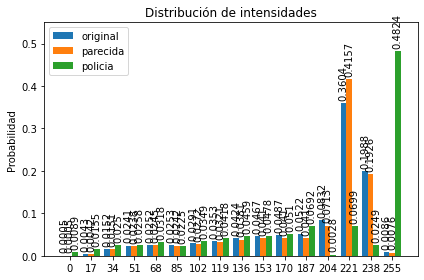

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

def autolabel(rects,ax):
    for rect in rects:
      height = round((float)(rect.get_height()),4)
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom',fontsize=10,rotation=90)
        
def histogram_multiple(distribucion1,label1,distribucion2,label2,distribucion3,label3):
    
    #ordenamos los diccionarios por clave (intensidades)
    d1 = OrderedDict(sorted(distribucion1.items()))
    d2 = OrderedDict(sorted(distribucion2.items()))
    d3 = OrderedDict(sorted(distribucion3.items()))
    b = OrderedDict(sorted(distribucion_original.items()))

    #obtenemos las intensidades a partir de cualquier diccionario
    intensidades = list(d1.keys())
    
    #obtenemos los valores
    d1_valores = list(d1.values())
    d2_valores = list(d2.values())
    d3_valores = list(d3.values())


    ind = np.arange(len(intensidades))  # the x locations for the groups
    width = 0.525  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar((ind - width/2)*2, d1_valores, width,
                    label=label1)
    rects2 = ax.bar((ind)*2, d2_valores, width,
                    label=label2)
    rects3 = ax.bar((ind + width/2)*2, d3_valores, width,
                    label=label3)
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probabilidad')
    ax.set_title('Distribución de intensidades')
    ax.set_xticks(ind*2)
    ax.set_xticklabels(intensidades)
    ax.legend()
    
    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax)

    fig.tight_layout()

    plt.show()
    
histogram_multiple(distribucion_original,'original',distribucion_parecida,'parecida',distribucion_policia,'policia')

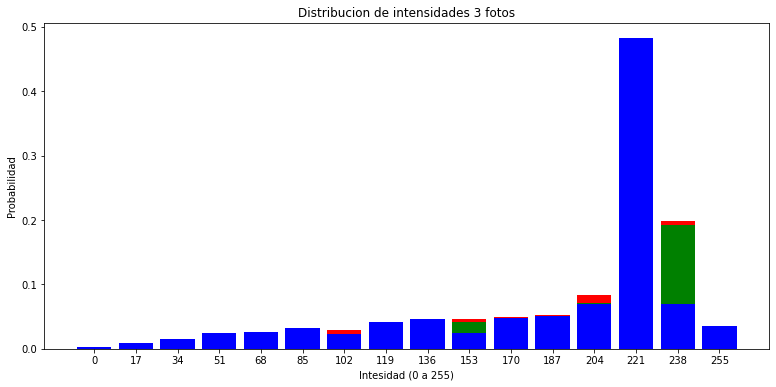

In [6]:
import matplotlib.pyplot as plt
'''
x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()

'''

intensidades = list(distribucion_original.keys())
valores1 = list(distribucion_original.values())
valores2 = list(distribucion_parecida.values())
valores3 = list(distribucion_policia.values())


# configuracion del plotting
ejes = plt.subplot(111)
ejes.bar(intensidades,valores1,width=14,color='r',align='center',label="Foto original")
ejes.bar(intensidades,valores2,width=14,color='g',align='center',label="Foto mas parecida")
ejes.bar(intensidades,valores3,width=14,color='b',align='center',label="Foto del policia")
plt.xticks(intensidades,intensidades)

# titulos y labels
ejes.set_title('Distribucion de intensidades 3 fotos')
ejes.set_xlabel('Intesidad (0 a 255)')
ejes.set_ylabel('Probabilidad')

# Mostrar el grafico
plt.show()

In [7]:
import math

def media_dist(dist, cuadrada=False):
    suma = 0.0
    for x in dist:
        if(cuadrada):
            suma += x*x*dist[x]
        else:
            suma += x*dist[x]
    return float(suma)

def desvio_dist(dist, media_distribucion):
    media_cuadrada_dist = media_dist(dist,True)
    varianza = media_cuadrada_dist - (media_distribucion*media_distribucion)
    return math.sqrt(varianza)

distribuciones = [(distribucion_original,"Dist original"), (distribucion_parecida,"Dist parecida"), (distribucion_policia,"Dist policia")]
for dist, nombre in distribuciones:
    media_distribucion = media_dist(dist)
    desvio_distribucion = desvio_dist(dist, media_distribucion)
    print(nombre)
    print(media_distribucion)
    print(desvio_distribucion)
    print("************")
    

Dist original
189.9449923664122
55.70177307571604
************
Dist parecida
192.4244961832061
55.15561366734102
************
Dist policia
195.15137404580153
73.83400301980652
************


3. Implementar un algoritmo que permita codificar una imagen mediante el método de Huffman y posteriormente reconstruirla mediante otro algoritmo decodificador (el archivo comprimido deberá contener la secuencia de bits codificados junto con los datos necesarios para la reconstrucción de la imagen original). Con dicho algoritmo codificador:
    - a) Comprimir con Huffman semi-estático la imagen original.
    - b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
    - c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
    - d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para  la propia imagen. Comparar con el resultado del inciso anterior.
    - e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d).
Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

In [34]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter

#Devuelve los dos nodos de menor probabilidad
def get_mas_chicos(arr):
  nodo1 = arr[0] # el valor mas chico
  nodo2 = arr[1] # el segundo mas chico
  i = 2
  while i < len(arr):
    if arr[i].prob < nodo1.prob :
      nodo2 = nodo1
      nodo1 = arr[i]
    elif arr[i].prob < nodo2.prob :
      nodo2 = arr[i]
    i += 1
  return nodo1,nodo2

#Actualiza los codigos de los nodos que fusiono
def actualizar_codigos(codigos,nodo1,nodo2):
  for hoja in nodo1.leaves :
    codigos[hoja.name] = '1' + codigos[hoja.name]
  for hoja in nodo2.leaves :
    codigos[hoja.name] = '0' +codigos[hoja.name]

#Fusiona los dos nodos de menor prob y los elimina de los nodos
def fusionar_nodos(nodos,nodo1,nodo2):
  nodos.remove(nodo1)
  nodos.remove(nodo2)
  grupo = Node(nodo1.name + nodo2.name,prob=nodo1.prob + nodo2.prob)
  nodo1.parent = grupo
  nodo2.parent = grupo
  return grupo

#Genera el codigo de huffman y su arbol correspondiente
def generar_codigo_huffman(dist):
  nodos = []
  codigos = {}
  for key in dist:
    nodos.append(Node(key,prob=dist[key]))
    codigos[key] = ""
  while len(nodos) != 1:
    nodo1, nodo2 = get_mas_chicos(nodos)
    grupo = fusionar_nodos(nodos,nodo1,nodo2)
    actualizar_codigos(codigos,nodo1,nodo2)
    nodos.append(grupo)
  return codigos,nodos[0]

In [35]:
codigos_will_original, arbol_will_original = generar_codigo_huffman(distribucion_original)

for pre, _, node in RenderTree(arbol_will_original):
    if node.is_root:
        print(pre)
    else:
        bigger = 0
        for s in node.siblings:
            if s.prob > node.prob:
                bigger = 1
        if node.is_leaf:
            print("%s%s=>%s | %s" % (pre, bigger, node.name, node.prob))
        else:
            print("%s%s" % (pre,bigger))
# graphviz needs to be installed for the next line!
#DotExporter(arbol_will_original).to_picture("udo.png")


├── 1
│   ├── 1
│   │   ├── 1
│   │   │   ├── 1=>136 | 0.04238796587337225
│   │   │   └── 0=>153 | 0.04666771441400988
│   │   └── 0
│   │       ├── 1=>170 | 0.048701841041760216
│   │       └── 0
│   │           ├── 1=>51 | 0.02414683430624158
│   │           └── 0=>68 | 0.025161652447238437
│   └── 0
│       ├── 1
│       │   ├── 1=>187 | 0.05222900763358779
│       │   └── 0
│       │       ├── 1=>85 | 0.025297709923664122
│       │       └── 0
│       │           ├── 1
│       │           │   ├── 1
│       │           │   │   ├── 1=>0 | 0.00047373147732375395
│       │           │   │   └── 0=>17 | 0.004271216883700045
│       │           │   └── 0=>255 | 0.008626852267624607
│       │           └── 0=>34 | 0.015194881005837449
│       └── 0
│           ├── 1
│           │   ├── 1=>102 | 0.029128423888639426
│           │   └── 0=>119 | 0.03527929950606197
│           └── 0=>204 | 0.08321239335428827
└── 0
    ├── 0=>221 | 0.360416255051639
    └── 1=>238 | 0.19880422092501124


In [6]:
def guardar_bits_a_archivo(lista_de_bits, nombre_archivo):
    # vamos a ir armando una lista de bytes (que vamos a representar con chars, ya
    # que este tipo de dato tiene 8 bits)
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        byte = chr(int(''.join([str(bit) for bit in ocho_bits]), 2))
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # imprimo mi representacion en chars
    print(lista_de_bytes)
    # la convierto en un único string
    data_en_un_unico_string = ''.join(lista_de_bytes)

    # y los escribo en mi archivo como datos en bytes
    with open(nombre_archivo, 'w') as f:
        f.write(data_en_un_unico_string)
        return True
    return False

In [7]:
def leer_bits_de_archivo(nombre_archivo):
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open(nombre_archivo, 'rb') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break

    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])

    print(result)
    return result

In [36]:
print(codigos_will_original)

def generar_codigo(imagen,codigo):
    codificacion = []
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for c in codigo[imagen[i][j]]:
                codificacion.append(c)
    return codificacion

codificacion_original = generar_codigo(will_original, codigos_will_original)

{221: '01', 238: '00', 204: '1000', 187: '1011', 170: '1101', 153: '1110', 136: '1111', 119: '10010', 255: '1010010', 102: '10011', 85: '10101', 68: '11000', 51: '11001', 34: '101000', 17: '10100110', 0: '10100111'}


In [13]:
guardar_bits_a_archivo(codificacion_original, "original.teoinfo")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



True

In [8]:
bits = leer_bits_de_archivo("original.teoinfo")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
bits_extra = 0
def decodificar_valores(arbol, datos, ancho):
    imagen = [[]]
    i=0
    j=0
    hoja = arbol
    index = 0
    while index != len(datos):
        if hoja.is_leaf:
            if i % ancho == 0:
                imagen.append([])
                
            imagen[int(i/ancho)].append(hoja.name)
            hoja = arbol  
            i+=1
        else:
            d = datos[index]
            if d == 0:
                if hoja.children[0].prob >= hoja.children[1].prob:
                    hoja = hoja.children[0]
                else:
                    hoja = hoja.children[1]
            else:
                if hoja.children[0].prob >= hoja.children[1].prob:
                    hoja = hoja.children[1]
                else:
                    hoja = hoja.children[0]
            index += 1
        
        if index % 1000 == 0:
            print("dato n ",str(index))
    return imagen

imagen = decodificar_valores(arbol_will_original, bits, len(will_original[0]))

dato n  1000
dato n  2000
dato n  3000
dato n  4000
dato n  5000
dato n  6000
dato n  7000
dato n  8000
dato n  9000
dato n  10000
dato n  11000
dato n  12000
dato n  13000
dato n  14000
dato n  15000
dato n  16000
dato n  17000
dato n  18000
dato n  19000
dato n  20000
dato n  21000
dato n  22000
dato n  23000
dato n  24000
dato n  25000
dato n  26000
dato n  27000
dato n  28000
dato n  29000
dato n  30000
dato n  31000
dato n  32000
dato n  33000
dato n  34000
dato n  35000
dato n  36000
dato n  37000
dato n  38000
dato n  39000
dato n  40000
dato n  41000
dato n  42000
dato n  43000
dato n  44000
dato n  45000
dato n  46000
dato n  47000
dato n  48000
dato n  49000
dato n  50000
dato n  51000
dato n  52000
dato n  53000
dato n  54000
dato n  55000
dato n  56000
dato n  57000
dato n  58000
dato n  59000
dato n  60000
dato n  61000
dato n  62000
dato n  63000
dato n  64000
dato n  65000
dato n  66000
dato n  67000
dato n  68000
dato n  69000
dato n  70000
dato n  71000
dato n  72000
d

dato n  536000
dato n  536000
dato n  537000
dato n  537000
dato n  538000
dato n  539000
dato n  540000
dato n  541000
dato n  541000
dato n  542000
dato n  543000
dato n  544000
dato n  545000
dato n  546000
dato n  547000
dato n  548000
dato n  549000
dato n  550000
dato n  551000
dato n  552000
dato n  553000
dato n  554000
dato n  555000
dato n  556000
dato n  556000
dato n  557000
dato n  558000
dato n  559000
dato n  560000
dato n  560000
dato n  561000
dato n  561000
dato n  562000
dato n  563000
dato n  563000
dato n  564000
dato n  565000
dato n  566000
dato n  567000
dato n  568000
dato n  569000
dato n  570000
dato n  570000
dato n  571000
dato n  572000
dato n  573000
dato n  574000
dato n  575000
dato n  576000
dato n  577000
dato n  578000
dato n  579000
dato n  579000
dato n  580000
dato n  581000
dato n  582000
dato n  583000
dato n  584000
dato n  585000
dato n  586000
dato n  587000
dato n  588000
dato n  589000
dato n  590000
dato n  591000
dato n  592000
dato n  59

dato n  1015000
dato n  1016000
dato n  1017000
dato n  1018000
dato n  1018000
dato n  1019000
dato n  1020000
dato n  1021000
dato n  1022000
dato n  1023000
dato n  1024000
dato n  1025000
dato n  1025000
dato n  1026000
dato n  1027000
dato n  1028000
dato n  1029000
dato n  1029000
dato n  1030000
dato n  1031000
dato n  1032000
dato n  1033000
dato n  1033000
dato n  1034000
dato n  1034000
dato n  1035000
dato n  1036000
dato n  1037000
dato n  1037000
dato n  1038000
dato n  1038000
dato n  1039000
dato n  1039000
dato n  1040000
dato n  1041000
dato n  1042000
dato n  1042000
dato n  1043000
dato n  1043000
dato n  1044000
dato n  1044000
dato n  1045000
dato n  1046000
dato n  1047000
dato n  1047000
dato n  1048000
dato n  1049000
dato n  1050000
dato n  1051000
dato n  1052000
dato n  1053000
dato n  1053000
dato n  1054000
dato n  1055000
dato n  1056000
dato n  1057000
dato n  1058000
dato n  1058000
dato n  1059000
dato n  1059000
dato n  1060000
dato n  1061000
dato n  

dato n  1443000
dato n  1443000
dato n  1444000
dato n  1445000
dato n  1446000
dato n  1447000
dato n  1448000
dato n  1449000
dato n  1450000
dato n  1451000
dato n  1452000
dato n  1453000
dato n  1454000
dato n  1455000
dato n  1456000
dato n  1457000
dato n  1458000
dato n  1458000
dato n  1459000
dato n  1460000
dato n  1461000
dato n  1461000
dato n  1462000
dato n  1463000
dato n  1463000
dato n  1464000
dato n  1465000
dato n  1466000
dato n  1467000
dato n  1467000
dato n  1468000
dato n  1469000
dato n  1470000
dato n  1471000
dato n  1472000
dato n  1473000
dato n  1474000
dato n  1475000
dato n  1476000
dato n  1476000
dato n  1477000
dato n  1478000
dato n  1479000
dato n  1480000
dato n  1481000
dato n  1482000
dato n  1483000
dato n  1484000
dato n  1484000
dato n  1485000
dato n  1486000
dato n  1487000
dato n  1488000
dato n  1489000
dato n  1490000
dato n  1491000
dato n  1492000
dato n  1492000
dato n  1493000
dato n  1494000
dato n  1494000
dato n  1495000
dato n  

dato n  1920000
dato n  1921000
dato n  1922000
dato n  1923000
dato n  1924000
dato n  1925000
dato n  1926000
dato n  1927000
dato n  1928000
dato n  1929000
dato n  1929000
dato n  1930000
dato n  1930000
dato n  1931000
dato n  1932000
dato n  1933000
dato n  1934000
dato n  1935000
dato n  1936000
dato n  1936000
dato n  1937000
dato n  1938000
dato n  1939000
dato n  1940000
dato n  1941000
dato n  1942000
dato n  1943000
dato n  1944000
dato n  1945000
dato n  1946000
dato n  1947000
dato n  1948000
dato n  1949000
dato n  1949000
dato n  1950000
dato n  1951000
dato n  1952000
dato n  1953000
dato n  1954000
dato n  1955000
dato n  1956000
dato n  1957000
dato n  1957000
dato n  1958000
dato n  1959000
dato n  1960000
dato n  1961000
dato n  1962000
dato n  1963000
dato n  1964000
dato n  1965000
dato n  1966000
dato n  1967000
dato n  1968000
dato n  1969000
dato n  1970000
dato n  1971000
dato n  1972000
dato n  1972000
dato n  1973000
dato n  1974000
dato n  1974000
dato n  

dato n  2358000
dato n  2359000
dato n  2360000
dato n  2361000
dato n  2362000
dato n  2363000
dato n  2364000
dato n  2365000
dato n  2366000
dato n  2366000
dato n  2367000
dato n  2368000
dato n  2369000
dato n  2369000
dato n  2370000
dato n  2371000
dato n  2372000
dato n  2373000
dato n  2374000
dato n  2374000
dato n  2375000
dato n  2375000
dato n  2376000
dato n  2377000
dato n  2378000
dato n  2379000
dato n  2380000
dato n  2381000
dato n  2382000
dato n  2383000
dato n  2384000
dato n  2384000
dato n  2385000
dato n  2386000
dato n  2387000
dato n  2388000
dato n  2389000
dato n  2390000
dato n  2391000
dato n  2392000
dato n  2393000
dato n  2393000
dato n  2394000
dato n  2395000
dato n  2396000
dato n  2396000
dato n  2397000
dato n  2398000
dato n  2399000
dato n  2399000
dato n  2400000
dato n  2401000
dato n  2401000
dato n  2402000
dato n  2403000
dato n  2404000
dato n  2405000
dato n  2406000
dato n  2406000
dato n  2407000
dato n  2408000
dato n  2409000
dato n  

dato n  2847000
dato n  2848000
dato n  2848000
dato n  2849000
dato n  2849000
dato n  2850000
dato n  2851000
dato n  2852000
dato n  2853000
dato n  2854000
dato n  2855000
dato n  2856000
dato n  2857000
dato n  2858000
dato n  2859000
dato n  2860000
dato n  2861000
dato n  2862000
dato n  2863000
dato n  2864000
dato n  2865000
dato n  2866000
dato n  2867000
dato n  2867000
dato n  2868000
dato n  2869000
dato n  2870000
dato n  2870000
dato n  2871000
dato n  2872000
dato n  2873000
dato n  2874000
dato n  2875000
dato n  2876000
dato n  2877000
dato n  2878000
dato n  2879000
dato n  2880000
dato n  2881000
dato n  2882000
dato n  2883000
dato n  2883000
dato n  2884000
dato n  2885000
dato n  2886000
dato n  2887000
dato n  2887000
dato n  2888000
dato n  2888000
dato n  2889000
dato n  2889000
dato n  2890000
dato n  2890000
dato n  2891000
dato n  2892000
dato n  2893000
dato n  2894000
dato n  2895000
dato n  2896000
dato n  2897000
dato n  2898000
dato n  2899000
dato n  

dato n  3317000
dato n  3318000
dato n  3319000
dato n  3320000
dato n  3321000
dato n  3322000
dato n  3323000
dato n  3324000
dato n  3325000
dato n  3326000
dato n  3327000
dato n  3328000
dato n  3329000
dato n  3330000
dato n  3331000
dato n  3332000
dato n  3333000
dato n  3333000
dato n  3334000
dato n  3335000
dato n  3336000
dato n  3337000
dato n  3337000
dato n  3338000
dato n  3339000
dato n  3340000
dato n  3340000
dato n  3341000
dato n  3342000
dato n  3343000
dato n  3344000
dato n  3344000
dato n  3345000
dato n  3345000
dato n  3346000
dato n  3346000
dato n  3347000
dato n  3348000
dato n  3349000
dato n  3349000
dato n  3350000
dato n  3351000
dato n  3352000
dato n  3353000
dato n  3354000
dato n  3354000
dato n  3355000
dato n  3356000
dato n  3357000
dato n  3358000
dato n  3359000
dato n  3360000
dato n  3360000
dato n  3361000
dato n  3361000
dato n  3362000
dato n  3363000
dato n  3364000
dato n  3365000
dato n  3365000
dato n  3366000
dato n  3367000
dato n  

dato n  3801000
dato n  3802000
dato n  3803000
dato n  3804000
dato n  3805000
dato n  3805000
dato n  3806000
dato n  3807000
dato n  3808000
dato n  3809000
dato n  3809000
dato n  3810000
dato n  3811000
dato n  3811000
dato n  3812000
dato n  3812000
dato n  3813000
dato n  3814000
dato n  3815000
dato n  3816000
dato n  3817000
dato n  3818000
dato n  3819000
dato n  3820000
dato n  3821000
dato n  3821000
dato n  3822000
dato n  3823000
dato n  3824000
dato n  3824000
dato n  3825000
dato n  3826000
dato n  3827000
dato n  3828000
dato n  3829000
dato n  3830000
dato n  3831000
dato n  3832000
dato n  3832000
dato n  3833000
dato n  3834000
dato n  3835000
dato n  3835000
dato n  3836000
dato n  3836000
dato n  3837000
dato n  3837000
dato n  3838000
dato n  3838000
dato n  3839000
dato n  3840000
dato n  3841000
dato n  3841000
dato n  3842000
dato n  3843000
dato n  3844000
dato n  3845000
dato n  3846000
dato n  3846000
dato n  3847000
dato n  3848000
dato n  3849000
dato n  

dato n  4305000
dato n  4305000
dato n  4306000
dato n  4307000
dato n  4308000
dato n  4309000
dato n  4310000
dato n  4310000
dato n  4311000
dato n  4312000
dato n  4313000
dato n  4313000
dato n  4314000
dato n  4315000
dato n  4316000
dato n  4317000
dato n  4318000
dato n  4319000
dato n  4320000
dato n  4321000
dato n  4321000
dato n  4322000
dato n  4323000
dato n  4324000
dato n  4325000
dato n  4326000
dato n  4327000
dato n  4328000
dato n  4329000
dato n  4330000
dato n  4331000
dato n  4332000
dato n  4333000
dato n  4334000
dato n  4335000
dato n  4336000
dato n  4337000
dato n  4337000
dato n  4338000
dato n  4339000
dato n  4340000
dato n  4340000
dato n  4341000
dato n  4342000
dato n  4343000
dato n  4344000
dato n  4345000
dato n  4345000
dato n  4346000
dato n  4347000
dato n  4348000
dato n  4349000
dato n  4350000
dato n  4351000
dato n  4351000
dato n  4352000
dato n  4353000
dato n  4354000
dato n  4355000
dato n  4356000
dato n  4357000
dato n  4358000
dato n  

dato n  4765000
dato n  4766000
dato n  4767000
dato n  4768000
dato n  4769000
dato n  4770000
dato n  4770000
dato n  4771000
dato n  4772000
dato n  4773000
dato n  4774000
dato n  4774000
dato n  4775000
dato n  4776000
dato n  4777000
dato n  4778000
dato n  4779000
dato n  4780000
dato n  4781000
dato n  4782000
dato n  4783000
dato n  4784000
dato n  4784000
dato n  4785000
dato n  4786000
dato n  4787000
dato n  4788000
dato n  4789000
dato n  4790000
dato n  4791000
dato n  4791000
dato n  4792000
dato n  4793000
dato n  4794000
dato n  4795000
dato n  4796000
dato n  4796000
dato n  4797000
dato n  4797000
dato n  4798000
dato n  4799000
dato n  4800000
dato n  4801000
dato n  4802000
dato n  4802000
dato n  4803000
dato n  4803000
dato n  4804000
dato n  4805000
dato n  4806000
dato n  4807000
dato n  4808000
dato n  4809000
dato n  4810000
dato n  4810000
dato n  4811000
dato n  4812000
dato n  4813000
dato n  4814000
dato n  4815000
dato n  4816000
dato n  4817000
dato n  

dato n  5244000
dato n  5244000
dato n  5245000
dato n  5246000
dato n  5247000
dato n  5248000
dato n  5249000
dato n  5250000
dato n  5251000
dato n  5252000
dato n  5253000
dato n  5254000
dato n  5255000
dato n  5256000
dato n  5257000
dato n  5258000
dato n  5259000
dato n  5260000
dato n  5260000
dato n  5261000
dato n  5261000
dato n  5262000
dato n  5263000
dato n  5263000
dato n  5264000
dato n  5264000
dato n  5265000
dato n  5266000
dato n  5266000
dato n  5267000
dato n  5267000
dato n  5268000
dato n  5269000
dato n  5270000
dato n  5271000
dato n  5272000
dato n  5273000
dato n  5274000
dato n  5275000
dato n  5276000
dato n  5277000
dato n  5278000
dato n  5278000
dato n  5279000
dato n  5280000
dato n  5281000
dato n  5282000
dato n  5283000
dato n  5284000
dato n  5285000
dato n  5286000
dato n  5286000
dato n  5287000
dato n  5288000
dato n  5289000
dato n  5290000
dato n  5291000
dato n  5291000
dato n  5292000
dato n  5293000
dato n  5294000
dato n  5295000
dato n  

dato n  5701000
dato n  5702000
dato n  5703000
dato n  5704000
dato n  5704000
dato n  5705000
dato n  5706000
dato n  5707000
dato n  5708000
dato n  5709000
dato n  5709000
dato n  5710000
dato n  5711000
dato n  5712000
dato n  5713000
dato n  5714000
dato n  5715000
dato n  5715000
dato n  5716000
dato n  5716000
dato n  5717000
dato n  5718000
dato n  5719000
dato n  5719000
dato n  5720000
dato n  5721000
dato n  5722000
dato n  5723000
dato n  5723000
dato n  5724000
dato n  5724000
dato n  5725000
dato n  5726000
dato n  5727000
dato n  5728000
dato n  5729000
dato n  5729000
dato n  5730000
dato n  5731000
dato n  5732000
dato n  5733000
dato n  5733000
dato n  5734000
dato n  5735000
dato n  5736000
dato n  5736000
dato n  5737000
dato n  5738000
dato n  5739000
dato n  5740000
dato n  5741000
dato n  5741000
dato n  5742000
dato n  5743000
dato n  5744000
dato n  5745000
dato n  5746000
dato n  5746000
dato n  5747000
dato n  5747000
dato n  5748000
dato n  5749000
dato n  

dato n  6139000
dato n  6140000
dato n  6141000
dato n  6142000
dato n  6143000
dato n  6144000
dato n  6144000
dato n  6145000
dato n  6146000
dato n  6147000
dato n  6148000
dato n  6149000
dato n  6150000
dato n  6151000
dato n  6152000
dato n  6153000
dato n  6154000
dato n  6155000
dato n  6156000
dato n  6157000
dato n  6158000
dato n  6158000
dato n  6159000
dato n  6159000
dato n  6160000
dato n  6161000
dato n  6162000
dato n  6163000
dato n  6164000
dato n  6165000
dato n  6166000
dato n  6167000
dato n  6167000
dato n  6168000
dato n  6169000
dato n  6170000
dato n  6170000
dato n  6171000
dato n  6172000
dato n  6173000
dato n  6174000
dato n  6175000
dato n  6176000
dato n  6177000
dato n  6178000
dato n  6179000
dato n  6180000
dato n  6181000
dato n  6182000
dato n  6183000
dato n  6183000
dato n  6184000
dato n  6185000
dato n  6186000
dato n  6187000
dato n  6188000
dato n  6189000
dato n  6190000
dato n  6191000
dato n  6192000
dato n  6193000
dato n  6194000
dato n  

dato n  6636000
dato n  6637000
dato n  6638000
dato n  6639000
dato n  6640000
dato n  6641000
dato n  6642000
dato n  6643000
dato n  6644000
dato n  6645000
dato n  6646000
dato n  6647000
dato n  6648000
dato n  6648000
dato n  6649000
dato n  6650000
dato n  6650000
dato n  6651000
dato n  6652000
dato n  6653000
dato n  6654000
dato n  6655000
dato n  6656000
dato n  6657000
dato n  6658000
dato n  6658000
dato n  6659000
dato n  6660000
dato n  6661000
dato n  6661000
dato n  6662000
dato n  6663000
dato n  6664000
dato n  6665000
dato n  6666000
dato n  6667000
dato n  6668000
dato n  6669000
dato n  6670000
dato n  6671000
dato n  6672000
dato n  6673000
dato n  6674000
dato n  6674000
dato n  6675000
dato n  6676000
dato n  6677000
dato n  6678000
dato n  6679000
dato n  6679000
dato n  6680000
dato n  6681000
dato n  6682000
dato n  6683000
dato n  6684000
dato n  6684000
dato n  6685000
dato n  6686000
dato n  6687000
dato n  6688000
dato n  6689000
dato n  6690000
dato n  

dato n  7088000
dato n  7089000
dato n  7089000
dato n  7090000
dato n  7091000
dato n  7092000
dato n  7093000
dato n  7094000
dato n  7095000
dato n  7095000
dato n  7096000
dato n  7097000
dato n  7098000
dato n  7099000
dato n  7100000
dato n  7101000
dato n  7102000
dato n  7102000
dato n  7103000
dato n  7104000
dato n  7104000
dato n  7105000
dato n  7106000
dato n  7107000
dato n  7108000
dato n  7109000
dato n  7110000
dato n  7111000
dato n  7112000
dato n  7113000
dato n  7114000
dato n  7115000
dato n  7116000
dato n  7117000
dato n  7117000
dato n  7118000
dato n  7118000
dato n  7119000
dato n  7120000
dato n  7121000
dato n  7122000
dato n  7122000
dato n  7123000
dato n  7124000
dato n  7125000
dato n  7126000
dato n  7127000
dato n  7128000
dato n  7129000
dato n  7129000
dato n  7130000
dato n  7131000
dato n  7132000
dato n  7133000
dato n  7134000
dato n  7135000
dato n  7135000
dato n  7136000
dato n  7137000
dato n  7138000
dato n  7139000
dato n  7140000
dato n  

dato n  7540000
dato n  7541000
dato n  7542000
dato n  7543000
dato n  7544000
dato n  7545000
dato n  7546000
dato n  7547000
dato n  7548000
dato n  7549000
dato n  7550000
dato n  7551000
dato n  7552000
dato n  7553000
dato n  7554000
dato n  7555000
dato n  7555000
dato n  7556000
dato n  7557000
dato n  7558000
dato n  7559000
dato n  7560000
dato n  7561000
dato n  7561000
dato n  7562000
dato n  7563000
dato n  7564000
dato n  7565000
dato n  7566000
dato n  7567000
dato n  7567000
dato n  7568000
dato n  7569000
dato n  7570000
dato n  7571000
dato n  7572000
dato n  7573000
dato n  7574000
dato n  7575000
dato n  7576000
dato n  7576000
dato n  7577000
dato n  7578000
dato n  7579000
dato n  7580000
dato n  7581000
dato n  7582000
dato n  7583000
dato n  7584000
dato n  7585000
dato n  7586000
dato n  7587000
dato n  7588000
dato n  7589000
dato n  7590000
dato n  7591000
dato n  7591000
dato n  7592000
dato n  7593000
dato n  7594000
dato n  7595000
dato n  7596000
dato n  

dato n  8019000
dato n  8020000
dato n  8021000
dato n  8022000
dato n  8022000
dato n  8023000
dato n  8024000
dato n  8025000
dato n  8026000
dato n  8026000
dato n  8027000
dato n  8028000
dato n  8029000
dato n  8030000
dato n  8031000
dato n  8032000
dato n  8032000
dato n  8033000
dato n  8034000
dato n  8035000
dato n  8036000
dato n  8037000
dato n  8038000
dato n  8039000
dato n  8040000
dato n  8041000
dato n  8042000
dato n  8043000
dato n  8044000
dato n  8045000
dato n  8046000
dato n  8047000
dato n  8048000
dato n  8049000
dato n  8050000
dato n  8051000
dato n  8052000
dato n  8053000
dato n  8054000
dato n  8055000
dato n  8056000
dato n  8057000
dato n  8057000
dato n  8058000
dato n  8059000
dato n  8060000
dato n  8061000
dato n  8061000
dato n  8062000
dato n  8063000
dato n  8063000
dato n  8064000
dato n  8065000
dato n  8066000
dato n  8067000
dato n  8067000
dato n  8068000
dato n  8068000
dato n  8069000
dato n  8069000
dato n  8070000
dato n  8071000
dato n  

dato n  8525000
dato n  8526000
dato n  8527000
dato n  8528000
dato n  8529000
dato n  8529000
dato n  8530000
dato n  8530000
dato n  8531000
dato n  8532000
dato n  8533000
dato n  8534000
dato n  8535000
dato n  8536000
dato n  8536000
dato n  8537000
dato n  8537000
dato n  8538000
dato n  8539000
dato n  8539000
dato n  8540000
dato n  8541000
dato n  8542000
dato n  8543000
dato n  8544000
dato n  8545000
dato n  8546000
dato n  8546000
dato n  8547000
dato n  8547000
dato n  8548000
dato n  8549000
dato n  8550000
dato n  8551000
dato n  8551000
dato n  8552000
dato n  8553000
dato n  8554000
dato n  8555000
dato n  8556000
dato n  8557000
dato n  8558000
dato n  8558000
dato n  8559000
dato n  8560000
dato n  8561000
dato n  8562000
dato n  8562000
dato n  8563000
dato n  8563000
dato n  8564000
dato n  8565000
dato n  8566000
dato n  8567000
dato n  8568000
dato n  8569000
dato n  8570000
dato n  8570000
dato n  8571000
dato n  8572000
dato n  8573000
dato n  8574000
dato n  

dato n  8997000
dato n  8998000
dato n  8999000
dato n  9000000
dato n  9001000
dato n  9002000
dato n  9003000
dato n  9004000
dato n  9005000
dato n  9006000
dato n  9007000
dato n  9008000
dato n  9009000
dato n  9010000
dato n  9010000
dato n  9011000
dato n  9012000
dato n  9013000
dato n  9014000
dato n  9015000
dato n  9016000
dato n  9017000
dato n  9017000
dato n  9018000
dato n  9019000
dato n  9020000
dato n  9021000
dato n  9022000
dato n  9023000
dato n  9023000
dato n  9024000
dato n  9025000
dato n  9026000
dato n  9027000
dato n  9028000
dato n  9029000
dato n  9030000
dato n  9030000
dato n  9031000
dato n  9032000
dato n  9033000
dato n  9034000
dato n  9035000
dato n  9036000
dato n  9037000
dato n  9038000
dato n  9039000
dato n  9039000
dato n  9040000
dato n  9040000
dato n  9041000
dato n  9042000
dato n  9043000
dato n  9044000
dato n  9045000
dato n  9046000
dato n  9047000
dato n  9048000
dato n  9049000
dato n  9050000
dato n  9051000
dato n  9051000
dato n  

dato n  9450000
dato n  9451000
dato n  9452000
dato n  9452000
dato n  9453000
dato n  9453000
dato n  9454000
dato n  9455000
dato n  9456000
dato n  9457000
dato n  9458000
dato n  9459000
dato n  9460000
dato n  9461000
dato n  9462000
dato n  9462000
dato n  9463000
dato n  9464000
dato n  9465000
dato n  9466000
dato n  9467000
dato n  9468000
dato n  9468000
dato n  9469000
dato n  9470000
dato n  9471000
dato n  9472000
dato n  9473000
dato n  9474000
dato n  9475000
dato n  9475000
dato n  9476000
dato n  9476000
dato n  9477000
dato n  9478000
dato n  9478000
dato n  9479000
dato n  9479000
dato n  9480000
dato n  9481000
dato n  9482000
dato n  9483000
dato n  9484000
dato n  9484000
dato n  9485000
dato n  9485000
dato n  9486000
dato n  9487000
dato n  9487000
dato n  9488000
dato n  9489000
dato n  9489000
dato n  9490000
dato n  9491000
dato n  9491000
dato n  9492000
dato n  9493000
dato n  9493000
dato n  9494000
dato n  9494000
dato n  9495000
dato n  9496000
dato n  

dato n  10308000
dato n  10309000
dato n  10310000
dato n  10311000
dato n  10312000
dato n  10312000
dato n  10313000
dato n  10314000
dato n  10315000
dato n  10316000
dato n  10316000
dato n  10317000
dato n  10318000
dato n  10319000
dato n  10319000
dato n  10320000
dato n  10320000
dato n  10321000
dato n  10322000
dato n  10323000
dato n  10323000
dato n  10324000
dato n  10324000
dato n  10325000
dato n  10325000
dato n  10326000
dato n  10327000
dato n  10327000
dato n  10328000
dato n  10328000
dato n  10329000
dato n  10330000
dato n  10331000
dato n  10332000
dato n  10333000
dato n  10334000
dato n  10335000
dato n  10336000
dato n  10337000
dato n  10337000
dato n  10338000
dato n  10338000
dato n  10339000
dato n  10340000
dato n  10341000
dato n  10342000
dato n  10343000
dato n  10344000
dato n  10345000
dato n  10346000
dato n  10346000
dato n  10347000
dato n  10347000
dato n  10348000
dato n  10349000
dato n  10350000
dato n  10351000
dato n  10351000
dato n  103520

In [33]:
print(type(will_original))
import numpy as np
imagen_np = np.asarray(imagen)

print(len(imagen))
print(len(imagen[0]))
print(len(will_original))
print(len(will_original[0]))

print(imagen[0])


<class 'imageio.core.util.Array'>
2830
1310
1700
1310
[68, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 170, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 238, 238, 238, 238, 238, 238, 204, 2